In [6]:
%matplotlib notebook

from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.patches import Circle

import numpy as np
import numpy.lib.index_tricks as itricks
import pandas as pd
from astropy.io import fits

# Inventory


| Date | ExpNum | Band | Downloaded | Comments |
| --- | --- | --- |  --- |  --- |
| 20120916   |  134528 | i   |  yes | |
| 20121003   | 138447-138449 | r  | no | files dont exist at NCSA |  
| 20121008   | 139381-2 | r | yes | more out of focus than others, big, but poor seeing |
| 20121023   |  142082-4 | r | yes | |
| 20121031   | 144987-990 | r | yes | |
| 20130919   | 236390 - 236394 | g,r,i,z,Y | yes | good Donuts | 
| 20140516   | 314450-6  | r | yes | good Donuts |

Use 20130919 and 20140516 Donuts for further analysis

used root tuple and command:
t->Scan("dateid:hexdz:filter:expid","hexdz>7000.")
************************************************************
*    Row   *    dateid *     expid *    filter *     hexdz *
************************************************************
*      433 *  20120916 *    134528 *         i * 12549.998 *
*     2907 *  20121003 *    138447 *         r *     12550 *
*     2908 *  20121003 *    138448 *         r * 12550.002 *
*     2909 *  20121003 *    138449 *         r * 12549.996 *
*     3106 *  20121008 *    139381 *         r * 19539.525 *
*     3107 *  20121008 *    139382 *         r * 19539.475 *
*     5462 *  20121031 *    144987 *         r *  9680.098 *
*     5463 *  20121031 *    144988 *         r *  9680.095 *
*     5464 *  20121031 *    144989 *         r *  9680.083 *
*     5465 *  20121031 *    144990 *         r *  9680.021 *
*   108270 *  20140516 *    314450 *         r * 12618.191 *
*   108271 *  20140516 *    314451 *         r * 12616.671 *
*   108272 *  20140516 *    314452 *         r * 12614.169 *
*   108273 *  20140516 *    314453 *         r * 12613.656 *
*   108274 *  20140516 *    314454 *         r * 12612.903 *
*   108275 *  20140516 *    314455 *         r * 12612.088 *
*   108276 *  20140516 *    314456 *         r *   12611.3 *
************************************************************

root [18] t->Scan("dateid:expid:filter:hexdz:hexapod_z","expid>=236389")
************************************************************************
*    Row   *    dateid *     expid *    filter *     hexdz * hexapod_z *
************************************************************************
*    59817 *  20130919 *    236389 *         g *  3301.348 *  3301.348 *
*    59818 *  20130919 *    236390 *         g * -999999.9 * -999999.9 *
*    59819 *  20130919 *    236391 *         r * -999999.9 * -999999.9 *
*    59820 *  20130919 *    236392 *         i * -999999.9 * -999999.9 *
*    59821 *  20130919 *    236393 *         z * -999999.9 * -999999.9 *
*    59822 *  20130919 *    236394 *         Y * -999999.9 * -999999.9 *



## Donut Jobs debugging and commands

submitDecamDriver.py -d 20130919 -n '236392'  -c bigdonuts-ScienceExtra-v23.cfg -seq 2 -ver 23 

decamDriver.py -i 236392 -o /u/ec/roodman/kipacdisk/Donuts/20130919s2/236392 -c bigdonuts-ScienceExtra-v23.cfg -seq 2 -ver 23 -d 20130919 

filterDecamImage.py -i /u/ec/roodman/kipacdisk/Donuts/20130919s2/236392/DECam_00236392.S1.corr.fits -o /u/ec/roodman/kipacdisk/Donuts/20130919s2/236392/DECam_00236392.S1.filter.fits -f /u/ec/roodman/Astrophysics/Donuts/bigdonut/bigdonuts_00236392.S4.1.stamp.fits

### Get a stamp
getPostageStamp.py -i /u/ec/roodman/kipacdisk/Donuts/20130919s2/236392/DECam_00236392.S4.corr.fits -es S4 -o bigdonuts_00236392 -n 256 -e S4

### Example donutfitWorker  job  

bsub -W 36:00 -R select[centos7] -o /u/ec/roodman/kipacdisk/Donuts/logfiles/20130919/DECam_00236392_S1.log donutfitWorkerDECam.py -i "'/u/ec/roodman/kipacdisk/Donuts/20130919s2/236392/DECam_00236392.S1.*.stamp.fits'" -o '/u/ec/roodman/kipacdisk/Donuts/20130919s2/236392/v23' -d 20130919 -seq 2 -ver 23 -c bigdonuts-ScienceExtra-v23.cfg --noSnip False

### Notes

Raised FLUX_AUTO cut to 10^6. Most donuts look useable now.

In [1]:
from astropy.io import ascii
catFile = '/nfs/slac/g/ki/ki06/roodman/Donuts/20130919s2/236392/cat.DECam_00236392.S4.txt'
mysexcat = ascii.read(catFile)

In [3]:
print(mysexcat)
print(mysexcat.columns)

NUMBER X_IMAGE  Y_IMAGE  FLAGS ... ERRB_IMAGE ERRTHETA_IMAGE FWHM_IMAGE
         pix      pix          ...    pix          deg          pix    
------ -------- -------- ----- ... ---------- -------------- ----------
     1 2146.582  954.858    25 ...     0.0197           89.8     203.28
     2 1183.299   306.83     0 ...      0.066           83.9       94.4
     3 2144.175   287.59    17 ...     0.0347           89.5      54.59
     4 2151.363  119.296    24 ...     0.0229           87.9      69.21
     5 1320.488    52.84    17 ...     0.0474           -1.5      68.22
     6  619.209   55.273    16 ...     0.0384           -0.8     144.09
     7 1659.747   42.797    16 ...     0.0947            7.7     106.35
     8 1070.506    24.61    16 ...     0.0713           -1.8      28.07
     9 1456.562   54.861    16 ...     0.0903            2.3      52.53
    10  2152.94    7.822    24 ...     0.0832           54.7      31.33
   ...      ...      ...   ... ...        ...            ...    

<IPython.core.display.Javascript object>


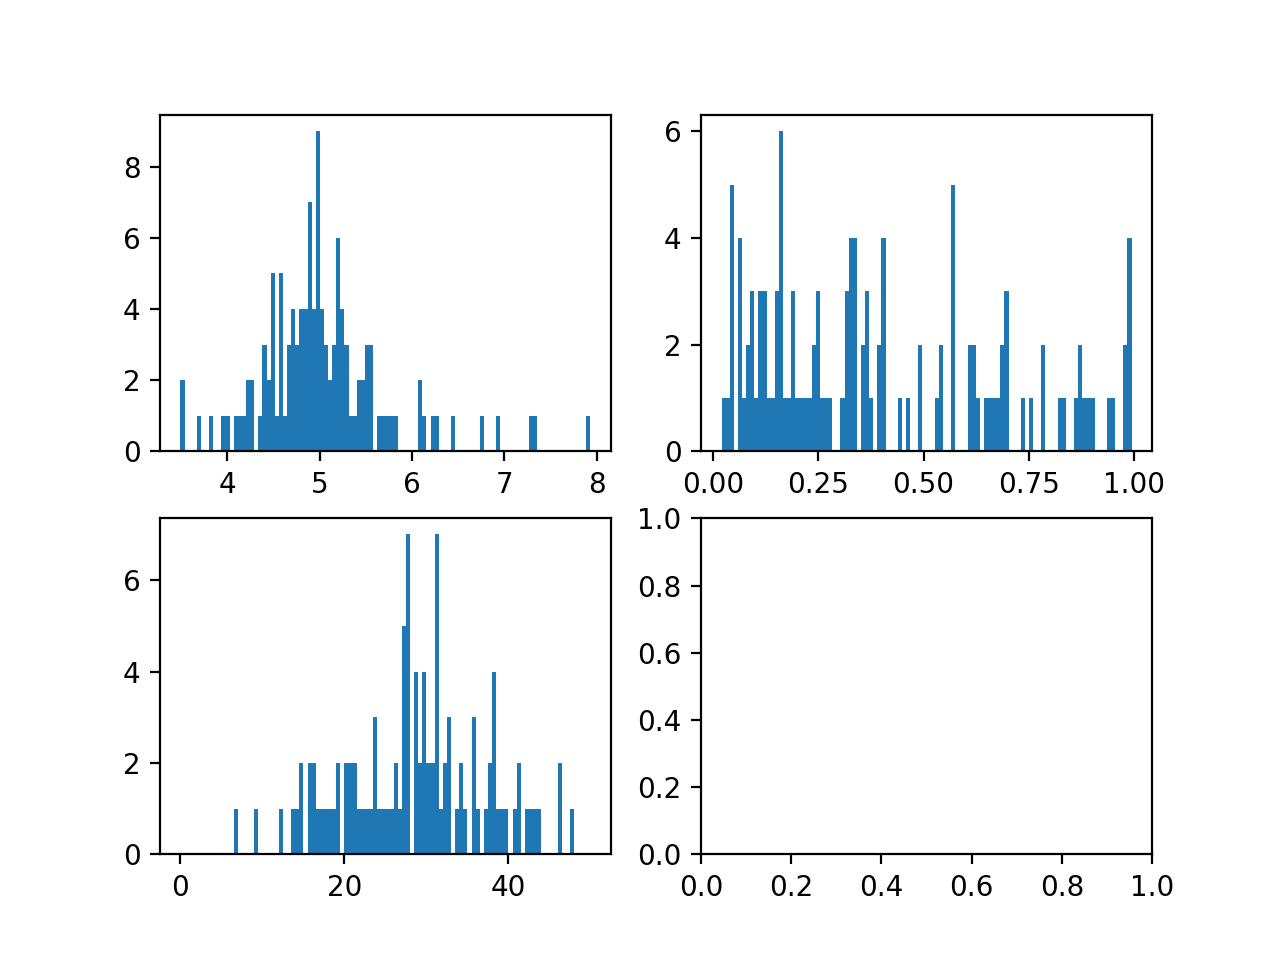

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 2., 0., 2., 2., 1.,
        1., 1., 1., 1., 2., 0., 2., 2., 2., 1., 1., 1., 1., 3., 1., 1., 1.,
        1., 2., 1., 5., 7., 0., 4., 2., 4., 2., 2., 7., 1., 2., 3., 0., 1.,
        2., 1., 0., 3., 1., 0., 1., 2., 4., 1., 1., 1., 0., 1., 2., 0., 1.,
        1., 1., 1., 0., 0., 0., 0., 2., 0., 0., 1., 0., 0., 0., 0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
        27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
        33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
        38.5, 39. , 39.5, 40. , 

In [14]:
# cutString : flux_auto>1.0e3 and flags<=1 and ellipticity<.3 and rdecam<225.0 and ave_image>5
# revise cuts for big donuts
f,axf = plt.subplots(2,2)
ax = axf.flatten()

h = ax[0].hist(np.log10(mysexcat['FLUX_AUTO']),bins=100)
h = ax[1].hist(mysexcat['ELLIPTICITY'],bins=100)
h = ax[2].hist(mysexcat['FLUX_RADIUS'],bins=100,range=(0.,50.))

<IPython.core.display.Javascript object>


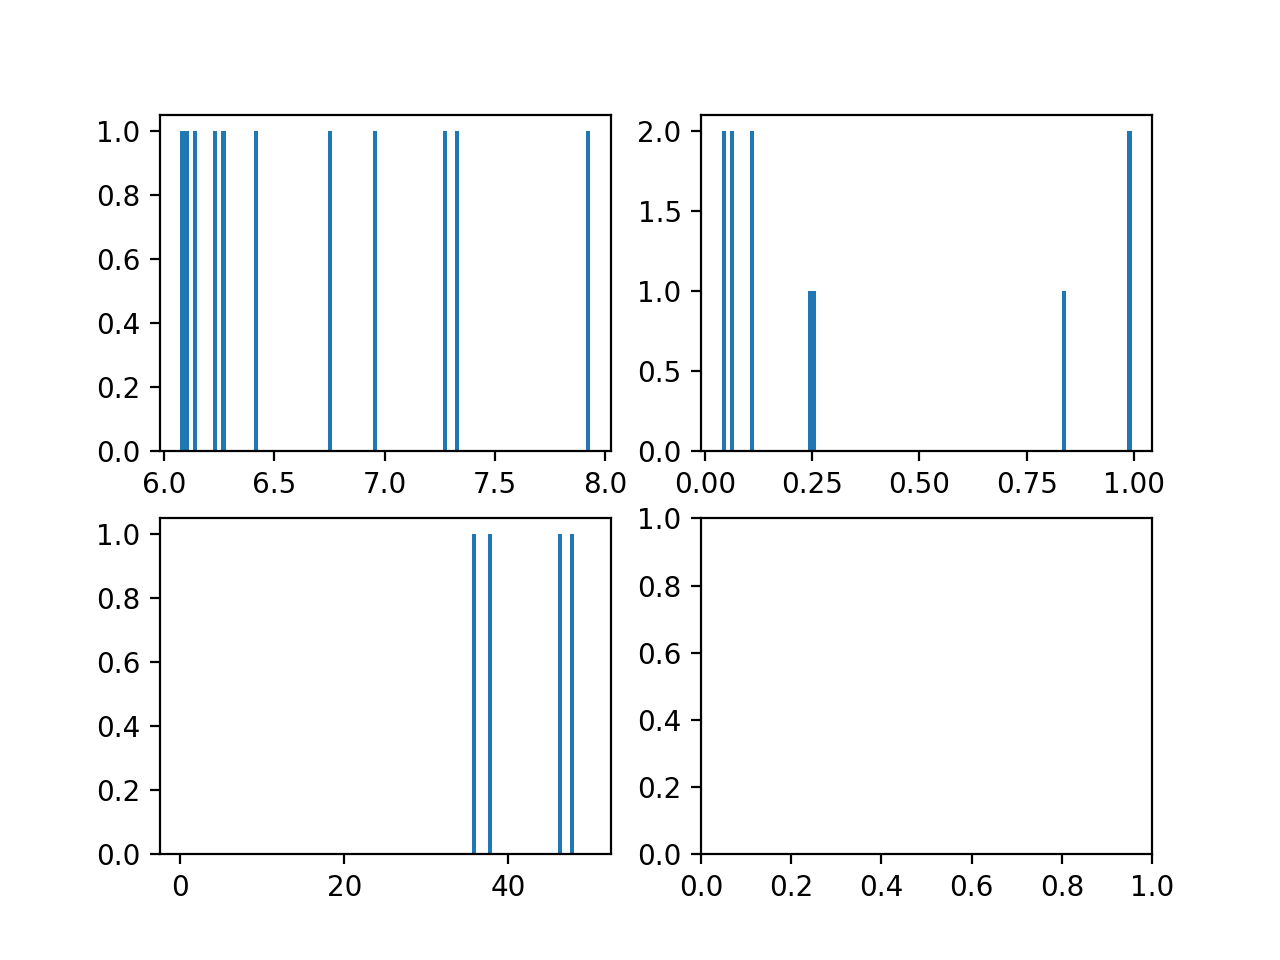

In [15]:
f,axf = plt.subplots(2,2)
ax = axf.flatten()

ok = (mysexcat['FLUX_AUTO']>1.e6)
selsexcat = mysexcat[ok]
h = ax[0].hist(np.log10(selsexcat['FLUX_AUTO']),bins=100)
h = ax[1].hist(selsexcat['ELLIPTICITY'],bins=100)
h = ax[2].hist(selsexcat['FLUX_RADIUS'],bins=100,range=(0.,50.))